In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
from keras.datasets import mnist

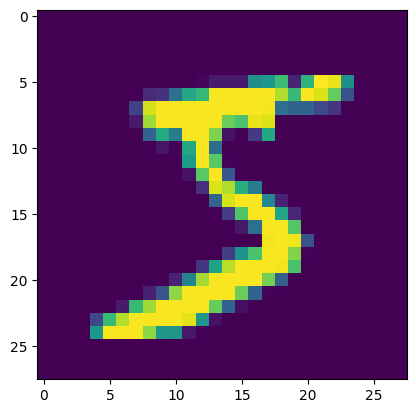

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])

In [10]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
x_train.shape # 60000 pictures, that are 28 by 28 grayscale

(60000, 28, 28)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1) # reshaping to include channel dimension, that is 1 for grayscale
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
model.fit(x_train, y_cat_train, epochs=2) # fitting on train set

Epoch 1/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1454 - accuracy: 0.9564
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0483 - accuracy: 0.9850


In [17]:
model.evaluate(x_test, y_cat_test) #evaluating on test set

313/313 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9839


[0.05127578228712082, 0.9839000105857849]

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
predictions[0] #probabilities for each category

array([1.8445085e-09, 1.3713735e-09, 4.9850252e-07, 2.9949242e-05,
       6.7338570e-09, 5.4206191e-09, 2.4453155e-13, 9.9996614e-01,
       1.1935120e-06, 2.2911049e-06], dtype=float32)

In [27]:
pred_classes = predictions[0].argmax()

pred_classes

7